In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/train.csv.zip',index_col='id')
train.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [3]:
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
id,,,,,,
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [4]:
test = pd.read_csv('data/test.csv.zip',index_col='id')
test.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000
mean,0.425474,0.503637,0.517288,0.464096
std,0.136079,0.158552,0.171727,0.179659
min,0.000000,0.000000,0.000000,0.000000
25%,0.329383,0.393987,0.388189,0.338964
50%,0.421989,0.510065,0.520220,0.461294
75%,0.519024,0.605957,0.644824,0.584448
max,1.000000,1.000000,0.999841,1.000000


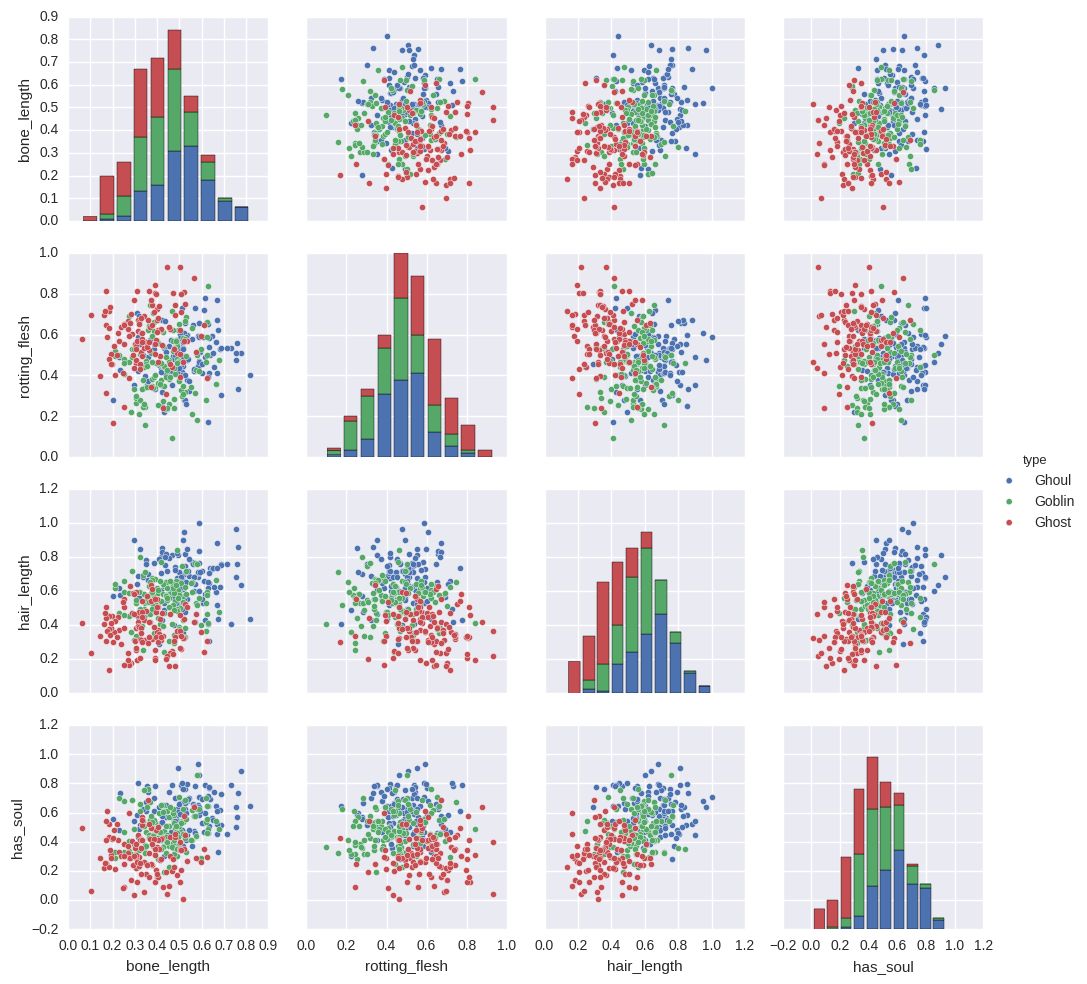

In [5]:
sns.set()
sns.pairplot(train,hue="type")

In [6]:
train.groupby(['color']).mean()

,bone_length,rotting_flesh,hair_length,has_soul
color,,,,
black,0.447786,0.538532,0.517582,0.457945
blood,0.403458,0.531120,0.499491,0.477230
blue,0.481672,0.549136,0.461715,0.525404
clear,0.426179,0.479179,0.556542,0.486162
green,0.447810,0.512057,0.532017,0.436679
white,0.428988,0.512015,0.519593,0.465119


In [25]:
Y = train['type']
X = train.drop(['type'], axis=1)
X = pd.get_dummies(X)
test = pd.get_dummies(test)
X.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_black,color_blood,color_blue,color_clear,color_green,color_white
id,,,,,,,,,,
0,0.354512,0.350839,0.465761,0.781142,0.0,0.0,0.0,1.0,0.0,0.0
1,0.575560,0.425868,0.531401,0.439899,0.0,0.0,0.0,0.0,1.0,0.0
2,0.467875,0.354330,0.811616,0.791225,1.0,0.0,0.0,0.0,0.0,0.0
4,0.776652,0.508723,0.636766,0.884464,1.0,0.0,0.0,0.0,0.0,0.0
5,0.566117,0.875862,0.418594,0.636438,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
def save(fname, pred, test):
    res1 = pd.DataFrame()
    res1['id'] = test.index
    res1['type'] = pred
    res1.to_csv("submissions/{0}.csv".format(fname), index=False)
    res1

## Gradient Boosting

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for num_tree in np.arange(10,100, 10):
    gbc = GradientBoostingClassifier(n_estimators=num_tree, random_state=42, verbose=False)
    pred = cross_val_predict(gbc, X, Y, cv=kfold)
    print(num_tree)
    print(classification_report(Y, pred))

10
             precision    recall  f1-score   support

      Ghost       0.83      0.85      0.84       117
      Ghoul       0.76      0.70      0.73       129
     Goblin       0.62      0.66      0.64       125

avg / total       0.74      0.73      0.73       371

20
             precision    recall  f1-score   support

      Ghost       0.84      0.85      0.85       117
      Ghoul       0.75      0.71      0.73       129
     Goblin       0.62      0.64      0.63       125

avg / total       0.73      0.73      0.73       371

30
             precision    recall  f1-score   support

      Ghost       0.85      0.85      0.85       117
      Ghoul       0.76      0.73      0.75       129
     Goblin       0.63      0.66      0.64       125

avg / total       0.75      0.74      0.74       371

40
             precision    recall  f1-score   support

      Ghost       0.85      0.85      0.85       117
      Ghoul       0.75      0.74      0.75       129
     Goblin       0.63  

In [11]:
gbc = GradientBoostingClassifier(n_estimators=40, random_state=42, verbose=False)
gbc.fit(X,Y)
pred = gbc.predict(test)
save("submission_1", pred, test) # kaggle says it's 0.71267

## Random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

for num_tree in [1000, 5000, 10000]:
    rfc = RandomForestClassifier(n_estimators=num_tree, max_depth=7, random_state=42, verbose=False)
    pred = cross_val_predict(rfc, X, Y, cv=kfold)
    print(num_tree)
    print(classification_report(Y, pred))

1000
             precision    recall  f1-score   support

      Ghost       0.80      0.85      0.83       117
      Ghoul       0.76      0.71      0.73       129
     Goblin       0.59      0.61      0.60       125

avg / total       0.72      0.72      0.72       371

5000
             precision    recall  f1-score   support

      Ghost       0.82      0.86      0.84       117
      Ghoul       0.77      0.71      0.74       129
     Goblin       0.61      0.62      0.62       125

avg / total       0.73      0.73      0.73       371

10000
             precision    recall  f1-score   support

      Ghost       0.81      0.85      0.83       117
      Ghoul       0.77      0.72      0.74       129
     Goblin       0.61      0.62      0.61       125

avg / total       0.73      0.73      0.73       371



In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

rfc = RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=42, n_jobs=4)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_pred,y_test))

             precision    recall  f1-score   support

      Ghost       0.74      0.84      0.79        31
      Ghoul       0.68      0.82      0.75        34
     Goblin       0.75      0.57      0.65        47

avg / total       0.73      0.72      0.72       112

